In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
tf.__version__

'2.8.0'

In [3]:
keras.__version__

'2.8.0'

### Fashion Mnist 

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
y_train[0]

4

In [10]:
class_names[y_train[0]]

'Coat'

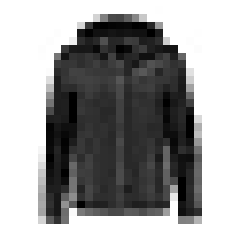

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

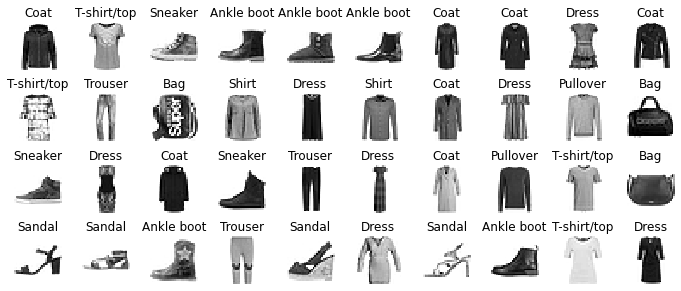

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Now let's build neural network

In [13]:
# one way to add layers
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
# add layers using sequential
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]

In [18]:
hidden1.name

'dense_3'

In [19]:
weights, biases = hidden1.get_weights()

In [20]:
weights

array([[-0.03974117,  0.05522811, -0.04187047, ...,  0.03740379,
        -0.04766843,  0.0093772 ],
       [-0.01711006,  0.04937245,  0.0610121 , ...,  0.01359202,
         0.00439024,  0.04059551],
       [ 0.06632568, -0.02640469, -0.03359874, ..., -0.06198108,
         0.00867651, -0.01242716],
       ...,
       [-0.01178057, -0.00779854,  0.01077289, ..., -0.0535849 ,
        -0.05460944,  0.031551  ],
       [ 0.00321724,  0.00123129, -0.00863481, ...,  0.07242231,
         0.02405366,  0.00230622],
       [ 0.06681234, -0.00666802,  0.01941419, ..., -0.02262357,
         0.07255602, -0.00441702]], dtype=float32)

In [21]:
weights.shape

(784, 300)

In [22]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [23]:
biases.shape

(300,)

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [25]:
# train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7049 - accuracy: 0.7700 - val_loss: 0.5327 - val_accuracy: 0.8148
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4827 - accuracy: 0.8313 - val_loss: 0.4479 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4392 - accuracy: 0.8457 - val_loss: 0.4288 - val_accuracy: 0.8462
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4120 - accuracy: 0.8555 - val_loss: 0.4237 - val_accuracy: 0.8534
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3920 - accuracy: 0.8627 - val_loss: 0.3884 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3762 - accuracy: 0.8665 - val_loss: 0.3682 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3621 - accuracy: 0.8713 - val_loss: 0.3593 - val_accuracy

There does not seem to be much overfitting going on

In [26]:
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,0.704909,0.769964,0.532682,0.8148
1,0.482724,0.831273,0.447942,0.8522
2,0.439195,0.845691,0.428850,0.8462
3,0.412046,0.855491,0.423700,0.8534
4,0.391966,0.862709,0.388414,0.8674


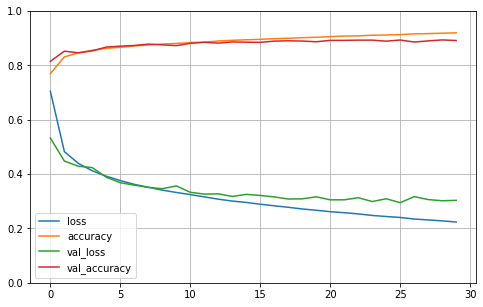

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The model is not converged yet because the validation loss is still going down

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3394 - accuracy: 0.8810


[0.339362233877182, 0.8809999823570251]

In [29]:
X_new = X_test[:3]

In [30]:
X_new.shape

(3, 28, 28)

In [31]:
y_proba = model.predict(X_new)

In [32]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred = np.argmax(model.predict(X_new), axis=-1)

In [34]:
y_pred

array([9, 2, 1])

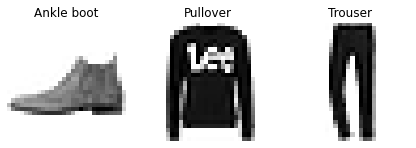

In [35]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Callifornia housing problem

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
housing = fetch_california_housing()

In [39]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(housing.data, housing.target)

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

The data is nosiy, we just use one hidden layer with fewer neurons to avoid overfitting.
We also only want to predict a single value, therefore, the output layer has only one neuron and no activation function

In [42]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [43]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
484/484 [==============================] - 2s 3ms/step - loss: 1.2050 - val_loss: 0.4766
Epoch 2/20
484/484 [==============================] - 1s 3ms/step - loss: 0.4501 - val_loss: 0.4345
Epoch 3/20
484/484 [==============================] - 1s 3ms/step - loss: 0.4610 - val_loss: 0.4104
Epoch 4/20
484/484 [==============================] - 1s 3ms/step - loss: 0.3960 - val_loss: 0.4054
Epoch 5/20
484/484 [==============================] - 1s 3ms/step - loss: 0.3888 - val_loss: 0.4036
Epoch 6/20
484/484 [==============================] - 1s 3ms/step - loss: 0.3797 - val_loss: 0.4011
Epoch 7/20
484/484 [==============================] - 1s 3ms/step - loss: 0.3745 - val_loss: 0.4002
Epoch 8/20
484/484 [==============================] - 1s 3ms/step - loss: 0.3713 - val_loss: 0.3926
Epoch 9/20
484/484 [==============================] - 1s 3ms/step - loss: 0.3693 - val_loss: 0.3987
Epoch 10/20
484/484 [==============================] - 1s 3ms/step - loss: 0.3655 - val_loss: 0.3895

In [44]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 7.6216


In [45]:
X_new = X_test[:3]

In [46]:
y_pred = model.predict(X_new)

In [47]:
y_pred

array([[3.8922849],
       [1.6244627],
       [7.910749 ]], dtype=float32)

### Functional API

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
# building complex models using the functional API
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_9[0][0]']            

In [51]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [52]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
484/484 [==============================] - 2s 3ms/step - loss: 1.0985 - val_loss: 0.6820
Epoch 2/20
484/484 [==============================] - 1s 3ms/step - loss: 0.6601 - val_loss: 0.5869
Epoch 3/20
484/484 [==============================] - 2s 3ms/step - loss: 0.5988 - val_loss: 0.5496
Epoch 4/20
484/484 [==============================] - 1s 3ms/step - loss: 0.5693 - val_loss: 0.5279
Epoch 5/20
484/484 [==============================] - 1s 3ms/step - loss: 0.5445 - val_loss: 0.5119
Epoch 6/20
484/484 [==============================] - 1s 3ms/step - loss: 0.5287 - val_loss: 0.4977
Epoch 7/20
484/484 [==============================] - 1s 3ms/step - loss: 0.5101 - val_loss: 0.4841
Epoch 8/20
484/484 [==============================] - 1s 3ms/step - loss: 0.4977 - val_loss: 0.4762
Epoch 9/20
484/484 [==============================] - 1s 3ms/step - loss: 0.4859 - val_loss: 0.4685
Epoch 10/20
484/484 [==============================] - 1s 3ms/step - loss: 0.4763 - val_loss: 0.4608

In [53]:
model.predict(X_new)

array([[2.6270664],
       [1.594507 ],
       [3.676556 ]], dtype=float32)

In [54]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
484/484 [==============================] - 2s 4ms/step - loss: 1.5195 - val_loss: 0.7605
Epoch 2/20
484/484 [==============================] - 2s 3ms/step - loss: 0.7303 - val_loss: 0.6388
Epoch 3/20
484/484 [==============================] - 1s 3ms/step - loss: 0.6480 - val_loss: 0.5828
Epoch 4/20
484/484 [==============================] - 2s 3ms/step - loss: 0.6017 - val_loss: 0.5507
Epoch 5/20
484/484 [==============================] - 1s 3ms/step - loss: 0.5713 - val_loss: 0.5275
Epoch 6/20
484/484 [==============================] - 2s 3ms/step - loss: 0.5491 - val_loss: 0.5133
Epoch 7/20
484/484 [==============================] - 1s 3ms/step - loss: 0.5309 - val_loss: 0.4952
Epoch 8/20
484/484 [==============================] - 2s 3ms/step - loss: 0.5158 - val_loss: 0.4887
Epoch 9/20
484/484 [==============================] - 2s 3ms/step - loss: 0.5035 - val_loss: 0.4853
Epoch 10/20
484/484 [==============================] - 1s 3ms/step - loss: 0.4952 - val_loss: 0.4742

In [56]:
y_pred

array([[2.5067215],
       [1.6641484],
       [3.445962 ]], dtype=float32)

In [57]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

In [58]:
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [59]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [60]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
484/484 [==============================] - 3s 4ms/step - loss: 0.8005 - main_output_loss: 0.7009 - aux_output_loss: 1.6967 - val_loss: 0.5581 - val_main_output_loss: 0.5056 - val_aux_output_loss: 1.0304
Epoch 2/20
484/484 [==============================] - 2s 3ms/step - loss: 0.5063 - main_output_loss: 0.4561 - aux_output_loss: 0.9582 - val_loss: 0.4876 - val_main_output_loss: 0.4487 - val_aux_output_loss: 0.8373
Epoch 3/20
484/484 [==============================] - 2s 4ms/step - loss: 0.4707 - main_output_loss: 0.4336 - aux_output_loss: 0.8052 - val_loss: 0.4591 - val_main_output_loss: 0.4283 - val_aux_output_loss: 0.7363
Epoch 4/20
484/484 [==============================] - 2s 3ms/step - loss: 0.4486 - main_output_loss: 0.4193 - aux_output_loss: 0.7120 - val_loss: 0.4467 - val_main_output_loss: 0.4222 - val_aux_output_loss: 0.6668
Epoch 5/20
484/484 [==============================] - 2s 3ms/step - loss: 0.4333 - main_output_loss: 0.4092 - aux_output_loss: 0.6495 - val_loss

In [61]:
model.save("function_API_model.h5")

In [62]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 6.6082 - main_output_loss: 6.4743 - aux_output_loss: 7.8129


In [63]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### Subclass API

In [64]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

In [65]:
model = WideAndDeepModel()

### Save a model

In [66]:
model = keras.models.load_model("function_API_model.h5")

In [67]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 30)           930         ['dense_11[0][0]']               
                                                                                            

### Using callbacks

In [68]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("function_API_model.h5")

In [69]:
checkpoint_cb

In [70]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
484/484 [==============================] - 2s 3ms/step - loss: 0.3516 - main_output_loss: 0.3400 - aux_output_loss: 0.4557
Epoch 2/10
484/484 [==============================] - 2s 3ms/step - loss: 0.3499 - main_output_loss: 0.3385 - aux_output_loss: 0.4527
Epoch 3/10
484/484 [==============================] - 1s 3ms/step - loss: 0.3495 - main_output_loss: 0.3384 - aux_output_loss: 0.4494
Epoch 4/10
484/484 [==============================] - 1s 3ms/step - loss: 0.3470 - main_output_loss: 0.3362 - aux_output_loss: 0.4447
Epoch 5/10
484/484 [==============================] - 1s 3ms/step - loss: 0.3462 - main_output_loss: 0.3356 - aux_output_loss: 0.4417
Epoch 6/10
484/484 [==============================] - 2s 3ms/step - loss: 0.3444 - main_output_loss: 0.3341 - aux_output_loss: 0.4370
Epoch 7/10
484/484 [==============================] - 2s 4ms/step - loss: 0.3432 - main_output_loss: 0.3331 - aux_output_loss: 0.4336
Epoch 8/10
484/484 [==============================] - 2s 4ms/s

In [71]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("function_API_model.h5", save_best_only=True)
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb])

Epoch 1/10
484/484 [==============================] - 2s 5ms/step - loss: 0.3383 - main_output_loss: 0.3290 - aux_output_loss: 0.4223 - val_loss: 0.3907 - val_main_output_loss: 0.3785 - val_aux_output_loss: 0.5000
Epoch 2/10
484/484 [==============================] - 2s 4ms/step - loss: 0.3366 - main_output_loss: 0.3273 - aux_output_loss: 0.4207 - val_loss: 0.3715 - val_main_output_loss: 0.3589 - val_aux_output_loss: 0.4856
Epoch 3/10
484/484 [==============================] - 2s 4ms/step - loss: 0.3371 - main_output_loss: 0.3280 - aux_output_loss: 0.4197 - val_loss: 0.3678 - val_main_output_loss: 0.3554 - val_aux_output_loss: 0.4790
Epoch 4/10
484/484 [==============================] - 2s 4ms/step - loss: 0.3354 - main_output_loss: 0.3264 - aux_output_loss: 0.4161 - val_loss: 0.3747 - val_main_output_loss: 0.3614 - val_aux_output_loss: 0.4940
Epoch 5/10
484/484 [==============================] - 3s 7ms/step - loss: 0.3348 - main_output_loss: 0.3259 - aux_output_loss: 0.4148 - val_loss

AttributeError: module 'keras.api._v2.keras' has no attribute 'model'

In [72]:
model = keras.models.load_model("function_API_model.h5")

In [73]:
model

In [74]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 30)           930         ['dense_11[0][0]']               
                                                                                            

In [76]:
os.curdir

'.'

In [77]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [78]:
root_logdir

'./my_logs'

In [81]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [82]:
run_logdir = get_run_logdir()

In [83]:
run_logdir

'./my_logs/run_2022_03_02-22_18_47'

### Fine-Tuning neural network hyperparameters

In [89]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [91]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-91-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [94]:
keras_reg.fit(X_train, y_train, epochs=10,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
484/484 [==============================] - 3s 3ms/step - loss: 1.0917 - val_loss: 0.6428
Epoch 2/10
484/484 [==============================] - 1s 3ms/step - loss: 0.6108 - val_loss: 0.5393
Epoch 3/10
484/484 [==============================] - 2s 4ms/step - loss: 0.5403 - val_loss: 0.4905
Epoch 4/10
484/484 [==============================] - 1s 3ms/step - loss: 0.5051 - val_loss: 0.4657
Epoch 5/10
484/484 [==============================] - 1s 3ms/step - loss: 0.4824 - val_loss: 0.4596
Epoch 6/10
484/484 [==============================] - 1s 3ms/step - loss: 0.4668 - val_loss: 0.4422
Epoch 7/10
484/484 [==============================] - 1s 3ms/step - loss: 0.4487 - val_loss: 0.4330
Epoch 8/10
484/484 [==============================] - 2s 3ms/step - loss: 0.4459 - val_loss: 0.4294
Epoch 9/10
484/484 [==============================] - 1s 3ms/step - loss: 0.4377 - val_loss: 0.4334
Epoch 10/10
484/484 [==============================] - 1s 3ms/step - loss: 0.4311 - val_loss: 0.4180

In [95]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.6586


In [96]:
y_pred = keras_reg.predict(X_new)

In [97]:
y_pred

array([2.4087446, 1.7327491, 3.783481 ], dtype=float32)

In [103]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
    'n_hidden':[1,2,3],
    'n_neurons':np.arange(1, 10),
    'learning_rate':reciprocal(3e-4, 3e-2),
}

In [104]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=2, cv=3)

In [105]:
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/10
323/323 [==============================] - 2s 4ms/step - loss: 4.8130 - val_loss: 2.5343
Epoch 2/10
323/323 [==============================] - 1s 3ms/step - loss: 2.1892 - val_loss: 1.6443
Epoch 3/10
323/323 [==============================] - 2s 7ms/step - loss: 1.6209 - val_loss: 1.3871
Epoch 4/10
323/323 [==============================] - 1s 3ms/step - loss: 1.4405 - val_loss: 1.3136
Epoch 5/10
323/323 [==============================] - 1s 3ms/step - loss: 1.3803 - val_loss: 1.2936
Epoch 6/10
323/323 [==============================] - 1s 3ms/step - loss: 1.3590 - val_loss: 1.2893
Epoch 7/10
323/323 [==============================] - 1s 3ms/step - loss: 1.3509 - val_loss: 1.2889
Epoch 8/10
323/323 [==============================] - 1s 3ms/step - loss: 1.3474 - val_loss: 1.2890
Epoch 9/10
323/323 [==============================] - 1s 3ms/step - loss: 1.3455 - val_loss: 1.2891
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 1.3615
Epoch 1/10
323/323

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fea174eda60>,
                   n_iter=2,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fea0948d220>,
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [106]:
rnd_search_cv.best_params_

{'learning_rate': 0.0017460040118129545, 'n_hidden': 1, 'n_neurons': 3}

In [107]:
rnd_search_cv.best_score_

-0.590338408946991

In [108]:
model = rnd_search_cv.best_estimator_.model

### Exercise 10: Train a deep MLP on the MNIST dataset

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

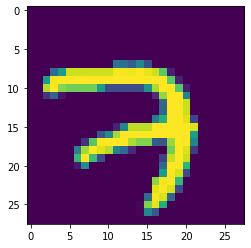

In [9]:
plt.imshow(X_train[0])

#### build a sequential API

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

In [13]:
model.layers

#### Search for the optimal learning rate
- growing the learning rate exponentially
- plotting the loss
- finding the point where the loss shoots up

In [16]:
K = keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.losses = []
        self.rates = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate*self.factor)

In [17]:
keras.backend.clear_session()

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [19]:
exponential_lr = ExponentialLearningRate(1.005)

In [20]:
history = model.fit(X_train, y_train,
                    epochs=1,
                    validation_data=[X_valid, y_valid],
                    callbacks=exponential_lr)

1719/1719 [==============================] - 12s 6ms/step - loss: 5.3777 - accuracy: 0.5584 - val_loss: 2.3907 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

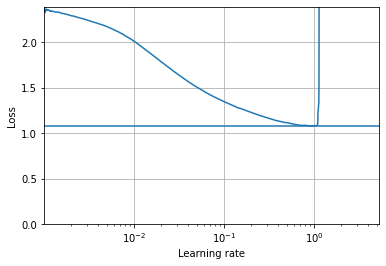

In [29]:
plt.plot(exponential_lr.rates, exponential_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(exponential_lr.losses), min(exponential_lr.rates), max(exponential_lr.rates))
plt.axis([min(exponential_lr.rates), max(exponential_lr.rates), 0, exponential_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [30]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [34]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

In [37]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_mnist_log.h5', save_best_only=True)

In [38]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [39]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=[X_valid, y_valid],
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 55s 6ms/step - loss: 0.2347 - accuracy: 0.9269 - val_loss: 0.1118 - val_accuracy: 0.9650
Epoch 2/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0928 - accuracy: 0.9716 - val_loss: 0.0836 - val_accuracy: 0.9744
Epoch 3/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0643 - accuracy: 0.9795 - val_loss: 0.0736 - val_accuracy: 0.9798
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0473 - accuracy: 0.9847 - val_loss: 0.0827 - val_accuracy: 0.9794
Epoch 5/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.0978 - val_accuracy: 0.9732
Epoch 6/100
1719/1719 [==============================] - 14s 8ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.0713 - val_accuracy: 0.9830
Epoch 7/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0818 - va

In [40]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3328 - accuracy: 0.1135


[2.332819700241089, 0.11349999904632568]

In [41]:
%tensorboard --logdir=./my_mnist_logs --port=6006

UsageError: Line magic function `%tensorboard` not found.
